In [38]:
import glob
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv2D
import random
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [39]:
crack_img = os.listdir('./dataset/cracks/')
dent_img = os.listdir('./dataset/dents/')
rust_img = os.listdir('./dataset/rust/')

In [40]:
print('Number of crack images : {}'.format(len(crack_img)))
print('Number of dent images : {}'.format(len(dent_img)))
print('Number of rust images : {}'.format(len(rust_img)))

def createDIR(img_list, base_url):
    img = []
    for i in img_list:
        img.append(os.path.join(base_url, i))
    return img

crackImg = createDIR(crack_img, "./dataset/cracks/")
dentImg = createDIR(dent_img, "./dataset/dents/")
rustImg = createDIR(rust_img, "./dataset/rust/")


Number of crack images : 820
Number of dent images : 982
Number of rust images : 119


In [41]:
lst_images_random = random.sample(crackImg,10) + random.sample(dentImg,10)+random.sample(rustImg,10)
print(lst_images_random)
random.shuffle(lst_images_random)
plt.figure(figsize = (20,20))
for img in lst_images_random:
    # plt.subplot(3,10,i+1)
    img = cv2.imread(img)
    print(img)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    # plt.imshow(img,cmap = 'gray')
plt.show()

['./dataset/cracks/crack(448).jpg', './dataset/cracks/crack(1046).jpg', './dataset/cracks/crack(613).jpg', './dataset/cracks/crack(573).jpg', './dataset/cracks/crack(641).jpg', './dataset/cracks/crack(681).jpg', './dataset/cracks/crack(269).jpg', './dataset/cracks/crack(226).jpg', './dataset/cracks/crack(181).jpg', './dataset/cracks/crack(1062).jpg', './dataset/dents/dent(1112).jpg', './dataset/dents/dent(434).jpg', './dataset/dents/dent(623).jpg', './dataset/dents/dent(449).jpg', './dataset/dents/dent(577).jpg', './dataset/dents/dent(1245).jpg', './dataset/dents/dent(775).jpg', './dataset/dents/dent(1090).jpg', './dataset/dents/dent(1243).jpg', './dataset/dents/dent(1138).jpg', './dataset/rust/rust(75).jpg', './dataset/rust/rust(3).jpg', './dataset/rust/rust(163).jpg', './dataset/rust/rust(31).jpg', './dataset/rust/rust(158).jpg', './dataset/rust/rust(106).jpg', './dataset/rust/rust(35).jpg', './dataset/rust/rust(14).jpg', './dataset/rust/rust(141).jpg', './dataset/rust/rust(89).jpg']

<Figure size 2000x2000 with 0 Axes>

In [42]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
labels = ["crack", "dent", "rust"]
lb.fit(labels)
lb.classes_
print(lb.classes_)
print(lb.transform(["crack"]))
print(lb.transform(["dent"]))
print(lb.transform(["rust"]))

['crack' 'dent' 'rust']
[[1 0 0]]
[[0 1 0]]
[[0 0 1]]


In [43]:
lst_crack = []
for x in crackImg:
  lst_crack.append([x,[1, 0, 0]])

In [44]:
lst_dent = []
for x in dentImg:
  lst_dent.append([x, [0, 1, 0]])

In [45]:
lst_rust = []
for x in rustImg:
  lst_rust.append([x, [0, 0, 1]])

In [46]:
lst_complete = lst_crack + lst_dent +lst_rust
random.shuffle(lst_complete)

In [47]:
df = pd.DataFrame(lst_complete,columns = ['files','target'])
df.head(10)

,files,target
0,./dataset/rust/rust(151).jpg,"[0, 0, 1]"
1,./dataset/dents/dent(456).jpg,"[0, 1, 0]"
2,./dataset/cracks/crack(448).jpg,"[1, 0, 0]"
3,./dataset/dents/dent(972).jpg,"[0, 1, 0]"
4,./dataset/dents/dent(586).jpg,"[0, 1, 0]"
5,./dataset/dents/dent(759).jpg,"[0, 1, 0]"
6,./dataset/cracks/crack(387).jpg,"[1, 0, 0]"
7,./dataset/dents/dent(1079).jpg,"[0, 1, 0]"
8,./dataset/cracks/crack(242).jpg,"[1, 0, 0]"
9,./dataset/cracks/crack(250).jpg,"[1, 0, 0]"


In [48]:
df.shape

(1921, 2)

In [49]:
# import albumentations as A

# def visualize(image):
#     plt.figure(figsize=(2, 2))
#     plt.axis('off')
#     plt.imshow(image)

# transform = A.Compose(
#     [A.CLAHE(),
#      A.RandomRotate90(),
#      A.Transpose(),
#      A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50,
#                         rotate_limit=45, p=.75),
#      A.Blur(blur_limit=3),
#      A.OpticalDistortion(),
#      A.GridDistortion(),
#      A.HueSaturationValue()])

In [50]:
def preprocessing_image(filepath):
  img = cv2.imread(filepath) 
  # img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR) 
  # img = cv2.resize(img,(196,196))  
  img = img / 255 
  return img 

In [51]:
def augmentation_image(filepath):
  img = cv2.imread(filepath)
  img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
  augmented_img = transform(image=img)['image']
  # img = cv2.resize(augmented_img,(196,196))  
  img = img / 255 
  return img 

In [52]:
def create_format_dataset(dataframe):
  X = []
  y = []
  for f,t in dataframe.values:
    X.append(preprocessing_image(f))
    y.append(t)
    # for i in range(3):
    #   X.append(augmentation_image(f))
    #   y.append(t)
  
  return np.array(X),np.array(y)

In [53]:
X, y = create_format_dataset(df)

In [54]:
X.shape,y.shape

((1921, 224, 224, 3), (1921, 3))

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y)

In [56]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1536, 224, 224, 3), (385, 224, 224, 3), (1536, 3), (385, 3))

In [57]:
model=Sequential([
    Conv2D(128,(2,2),input_shape = (224,224,3),activation='relu'),
    Conv2D(64,(2,2),activation='relu'),
    MaxPooling2D(),
    Dropout(0.5),
    Conv2D(32,(2,2),activation='relu'),
    MaxPooling2D(),
    Dropout(0.5),
    Flatten(),
    Dense(128),
    Dense(3,activation= "sigmoid")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 223, 223, 128)     1664      
                                                                 
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      32832     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 111, 111, 64)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 110, 110, 32)      8224      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                  

In [58]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 20, batch_size=32)

Epoch 1/20
48/48 [==============================] - 385s 7s/step - loss: 1.1359 - accuracy: 0.5423 - val_loss: 0.6215 - val_accuracy: 0.5247
Epoch 2/20
48/48 [==============================] - 301s 6s/step - loss: 0.5231 - accuracy: 0.5605 - val_loss: 0.5890 - val_accuracy: 0.5688
Epoch 3/20
48/48 [==============================] - 298s 6s/step - loss: 0.5106 - accuracy: 0.5938 - val_loss: 0.5851 - val_accuracy: 0.5351
Epoch 4/20
48/48 [==============================] - 298s 6s/step - loss: 0.5013 - accuracy: 0.6107 - val_loss: 0.6014 - val_accuracy: 0.5143
Epoch 5/20
48/48 [==============================] - 298s 6s/step - loss: 0.4936 - accuracy: 0.6250 - val_loss: 0.6204 - val_accuracy: 0.5247
Epoch 6/20
48/48 [==============================] - 300s 6s/step - loss: 0.4739 - accuracy: 0.6322 - val_loss: 0.6097 - val_accuracy: 0.5273
Epoch 7/20
48/48 [==============================] - 299s 6s/step - loss: 0.4847 - accuracy: 0.6335 - val_loss: 0.5918 - val_accuracy: 0.5247
Epoch 8/20
48

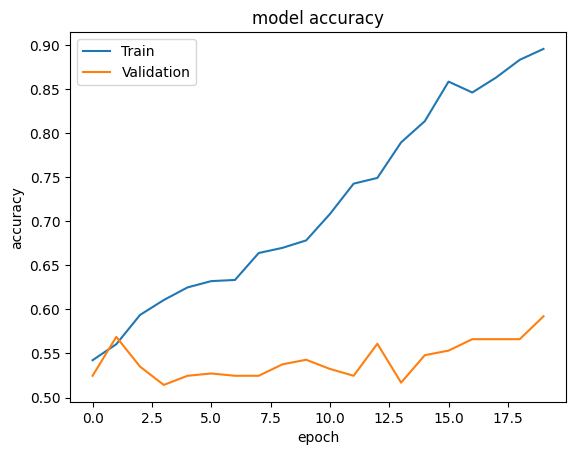

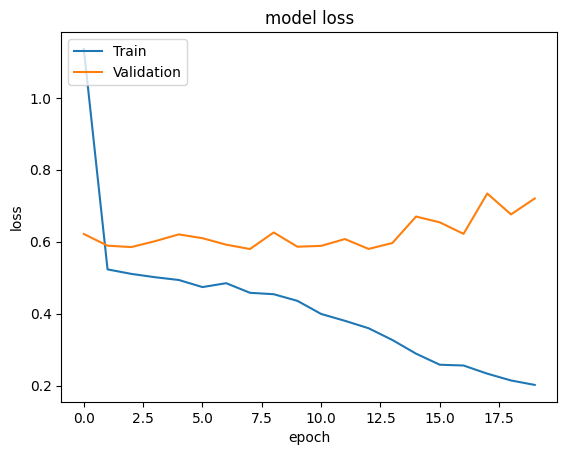

In [59]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [60]:
y_pred=model.predict(X_test) 

y_pred_cnn=np.argmax(y_pred, axis=1)
y_test_cnn=np.argmax(y_test, axis=1)
# print(y_pred)
# print(y_test)
cm = confusion_matrix(y_test_cnn, y_pred_cnn)
print(cm)

13/13 [==============================] - 13s 980ms/step
[[ 84  70  10]
 [ 53 138   6]
 [ 12   6   6]]


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test_cnn, y_pred_cnn))

              precision    recall  f1-score   support

           0       0.56      0.51      0.54       164
           1       0.64      0.70      0.67       197
           2       0.27      0.25      0.26        24

    accuracy                           0.59       385
   macro avg       0.49      0.49      0.49       385
weighted avg       0.59      0.59      0.59       385



In [62]:
from sklearn.ensemble import RandomForestClassifier
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2] * X_train.shape[3])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2] * X_test.shape[3])
X_train.shape, y_train.shape
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [63]:
y_pred_random = clf.predict(X_test)
y_pred_random = np.argmax(y_pred_random, axis = 1)
y_test_random = np.argmax(y_test, axis = 1)
# print(y_pred_random)
# print(y_test)
# print(y_pred_random)
cm_random = confusion_matrix(y_test_random, y_pred_random)
print(cm_random)
print(classification_report(y_test_random, y_pred_random))

[[ 90  74   0]
 [ 53 144   0]
 [ 16   8   0]]
              precision    recall  f1-score   support

           0       0.57      0.55      0.56       164
           1       0.64      0.73      0.68       197
           2       0.00      0.00      0.00        24

    accuracy                           0.61       385
   macro avg       0.40      0.43      0.41       385
weighted avg       0.57      0.61      0.59       385



c:\Users\Passion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Passion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Passion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [64]:
from sklearn.tree import DecisionTreeClassifier
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2] * X_train.shape[3])
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2] * X_test.shape[3])
X_train.shape, y_train.shape
dtf = DecisionTreeClassifier(max_depth=2, random_state=0)
dtf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [65]:
y_pred_dec = clf.predict(X_test)
y_pred_dec = np.argmax(y_pred_dec, axis = 1)
y_test_dec = np.argmax(y_test, axis = 1)
cm_dec = confusion_matrix(y_test_dec, y_pred_dec)
print(cm_dec)
print(classification_report(y_test_dec, y_pred_dec))

[[ 90  74   0]
 [ 53 144   0]
 [ 16   8   0]]
              precision    recall  f1-score   support

           0       0.57      0.55      0.56       164
           1       0.64      0.73      0.68       197
           2       0.00      0.00      0.00        24

    accuracy                           0.61       385
   macro avg       0.40      0.43      0.41       385
weighted avg       0.57      0.61      0.59       385



c:\Users\Passion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Passion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Passion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av